In [49]:
import dask
import dask.dataframe as dd
from dask.distributed import LocalCluster

In [50]:
cluster = LocalCluster()
client = cluster.get_client()

c:\Users\eigenaar\Documents\Data_mining\Data-Mining-For-The-Girls\.venv\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62906 instead
  warnings.warn(


In [52]:
import numpy as np
import pandas as pd

In [53]:
train = pd.read_csv("data/train_small.csv")
test = pd.read_csv("data/test_small.csv")

print(train.shape)

(175827, 56)


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

null_percent = train.isnull().mean()
columns_drop = null_percent[null_percent >= 0.5].index.tolist()
train = train.drop(columns= columns_drop)

train.shape

(175827, 28)

In [17]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.72,...,6,144,5,0,1,0,3748.90,0,1,1
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.70,...,6,144,5,0,1,0,3747.89,0,0,0
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,6,144,5,0,1,0,3748.71,0,0,0
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,5.88,...,6,144,5,0,1,0,3748.29,0,0,0
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.52,...,6,144,5,0,1,0,3748.98,0,0,0
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.69,...,6,144,5,0,1,0,3747.88,0,0,0
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,5.78,...,6,144,5,0,1,0,3747.98,0,0,0
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.71,...,6,144,5,0,1,0,3748.40,0,0,0
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,3.14,...,6,144,5,0,1,0,3746.26,0,0,0
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,5.74,...,6,144,5,0,1,0,3747.94,0,0,0


In [58]:
# train['total_price_stay'] = train['price_usd'] * train['srch_length_of_stay']
train = train.drop(['year', 'month'], axis = 1)
train['avg_location_score'] = train[['prop_location_score1', 'prop_location_score2']].mean(axis=1)
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.72,...,144,5,0,1,0,3748.90,0,1,1,2.91680
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.70,...,144,5,0,1,0,3747.89,0,0,0,2.91480
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,144,5,0,1,0,3748.71,0,0,0,2.97255
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,5.88,...,144,5,0,1,0,3748.29,0,0,0,3.04660
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.52,...,144,5,0,1,0,3748.98,0,0,0,2.79790
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.69,...,144,5,0,1,0,3747.88,0,0,0,2.90700
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,5.78,...,144,5,0,1,0,3747.98,0,0,0,2.96300
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.71,...,144,5,0,1,0,3748.40,0,0,0,2.90720
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,3.14,...,144,5,0,1,0,3746.26,0,0,0,1.57035
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,5.74,...,144,5,0,1,0,3747.94,0,0,0,2.93850


In [61]:
train = train.drop(['prop_location_score1', 'prop_location_score2'],axis = 1)
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.81,...,144,5,0,1,0,3748.90,0,1,1,2.91680
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.91,...,144,5,0,1,0,3747.89,0,0,0,2.91480
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,144,5,0,1,0,3748.71,0,0,0,2.97255
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,6.21,...,144,5,0,1,0,3748.29,0,0,0,3.04660
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.96,...,144,5,0,1,0,3748.98,0,0,0,2.79790
5,29,2013-02-26 19:42:22,18,129,219,32060,4,4.5,1,5.89,...,144,5,0,1,0,3747.88,0,0,0,2.90700
6,29,2013-02-26 19:42:22,18,129,219,36871,4,4.0,1,6.11,...,144,5,0,1,0,3747.98,0,0,0,2.96300
7,29,2013-02-26 19:42:22,18,129,219,62433,3,4.0,0,5.76,...,144,5,0,1,0,3748.40,0,0,0,2.90720
8,29,2013-02-26 19:42:22,18,129,219,73452,3,3.5,1,5.49,...,144,5,0,1,0,3746.26,0,0,0,1.57035
9,29,2013-02-26 19:42:22,18,129,219,78380,3,4.5,1,6.21,...,144,5,0,1,0,3747.94,0,0,0,2.93850


In [62]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_log_historical_price', 'position', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'avg_location_score'],
      dtype='object')

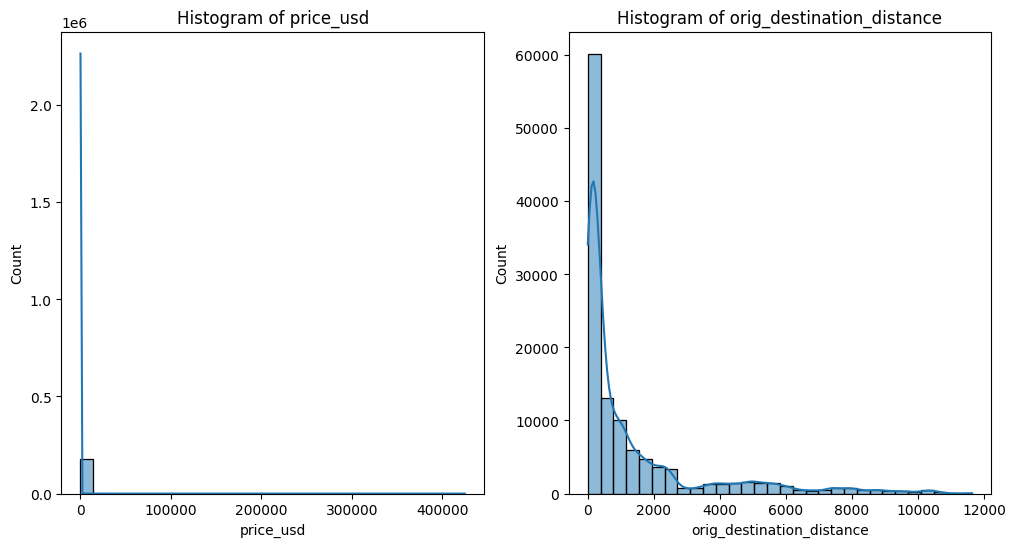

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['price_usd'], bins=30, kde=True)
plt.title('Histogram of price_usd')

plt.subplot(1, 2, 2)
sns.histplot(train['orig_destination_distance'], bins=30, kde=True)
plt.title('Histogram of orig_destination_distance')

plt.show()


In [64]:
from scipy.stats import skew

# Assuming 'df' is your DataFrame containing the dataset

# Compute skewness for 'price_usd' and 'orig_destination_distance'
skewness_price_usd = skew(train['price_usd'])
skewness_orig_destination_distance = skew(train['orig_destination_distance'])

print("Skewness of price_usd:", skewness_price_usd)
print("Skewness of orig_destination_distance:", skewness_orig_destination_distance)


Skewness of price_usd: 59.228813267026155
Skewness of orig_destination_distance: nan


In [68]:
# train['price_usd_log'] = np.log1p(train['price_usd'])  # Adding 1 to handle zero values
# print(train[['price_usd', 'price_usd_log']].head())

train['total_price_stay'] = train['price_usd'] * train['srch_length_of_stay']
train['total_price_stay_sqrt'] = np.sqrt(train['total_price_stay'])
print(train[['total_price_stay', 'total_price_stay_sqrt']].head())

   total_price_stay  total_price_stay_sqrt
0           1489.02              38.587822
1           4137.96              64.326977
2           3401.28              58.320494
3           3119.10              55.848903
4           2648.88              51.467271


In [71]:
# train = train.drop('total_price_stay', axis = 1)
train = train.drop('price_usd_sqrt', axis = 1)
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_log_historical_price', 'position', 'price_usd',
       'promotion_flag', 'srch_destination_id', 'srch_length_of_stay',
       'srch_booking_window', 'srch_adults_count', 'srch_children_count',
       'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'avg_location_score', 'total_price_stay_sqrt'],
      dtype='object')

In [73]:
train['family'] = (train['srch_children_count'] > 0).astype(int)  #0 is False and 1 is True
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_log_historical_price,...,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,booking_bool,avg_location_score,total_price_stay_sqrt,family
0,29,2013-02-26 19:42:22,18,129,219,1722,3,4.0,0,5.81,...,0,1,0,3748.90,0,1,1,2.91680,38.587822,0
1,29,2013-02-26 19:42:22,18,129,219,3858,4,4.5,0,5.91,...,0,1,0,3747.89,0,0,0,2.91480,64.326977,0
2,29,2013-02-26 19:42:22,18,129,219,7523,4,0.0,1,5.82,...,0,1,0,3748.71,0,0,0,2.97255,58.320494,0
3,29,2013-02-26 19:42:22,18,129,219,7880,4,4.5,1,6.21,...,0,1,0,3748.29,0,0,0,3.04660,55.848903,0
4,29,2013-02-26 19:42:22,18,129,219,31336,4,4.0,1,5.96,...,0,1,0,3748.98,0,0,0,2.79790,51.467271,0


In [38]:
train.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_brand_bool                0
prop_location_score1           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
click_bool                     0
booking_bool                   0
year                           0
month                          0
dtype: int64

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175827 entries, 0 to 175826
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      175827 non-null  int64  
 1   date_time                    175827 non-null  object 
 2   site_id                      175827 non-null  int64  
 3   visitor_location_country_id  175827 non-null  int64  
 4   prop_country_id              175827 non-null  int64  
 5   prop_id                      175827 non-null  int64  
 6   prop_starrating              175827 non-null  int64  
 7   prop_brand_bool              175827 non-null  int64  
 8   prop_location_score1         175827 non-null  float64
 9   prop_log_historical_price    175827 non-null  float64
 10  position                     175827 non-null  int64  
 11  price_usd                    175827 non-null  float64
 12  promotion_flag               175827 non-null  int64  
 13 

In [45]:
import seaborn as sns
df = train.corr()
print(df)

                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000 -0.001350                    -0.019315   
site_id                     -0.001350  1.000000                    -0.302651   
visitor_location_country_id -0.019315 -0.302651                     1.000000   
prop_country_id             -0.012428 -0.299768                     0.484435   
prop_id                     -0.003541  0.000309                     0.002768   
prop_starrating              0.004751  0.192703                    -0.123095   
prop_brand_bool             -0.001738 -0.199452                     0.181533   
prop_location_score1        -0.006099  0.174837                    -0.129909   
prop_log_historical_price    0.010102  0.060544                    -0.048921   
position                    -0.005390 -0.032870                     0.016644   
price_usd                    0.005762 -0.011375                    -0.013811   
promotion_flag               0.000192  0

<Axes: >

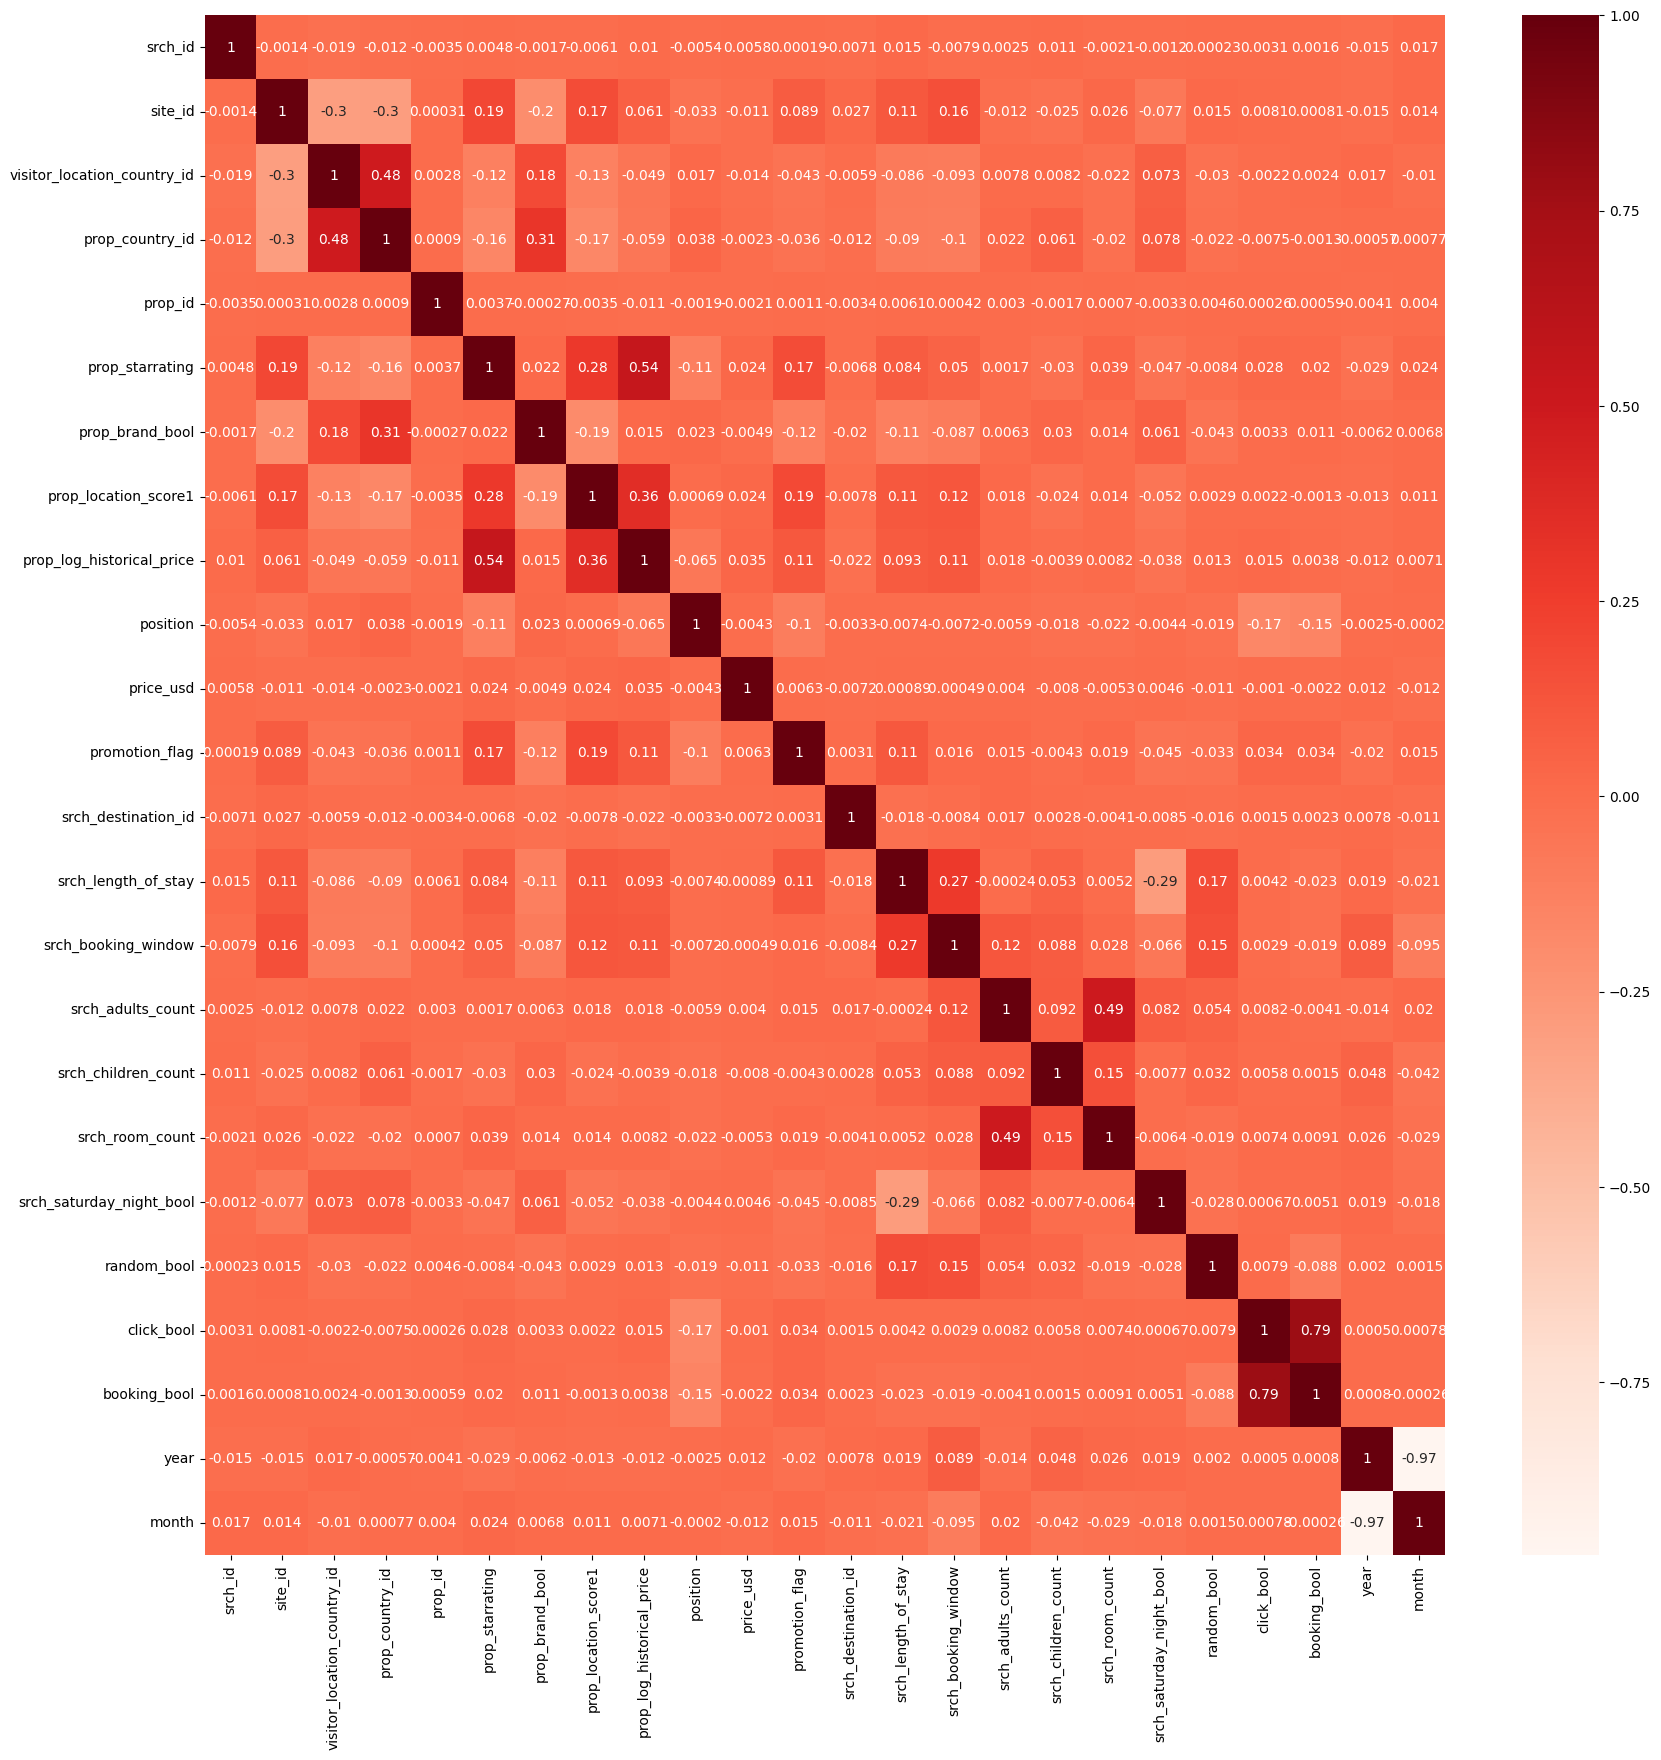

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df, annot = True, cmap = plt.cm.Reds)

In [50]:
train=train.drop(["srch_id","site_id","visitor_location_country_id","prop_country_id","prop_id","srch_destination_id"],axis=1)
